In [11]:
# Importing required libraries

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

In [12]:
# Load the Iris dataset

data = load_iris()
X = data.data  # Features
y = data.target.reshape(-1, 1)  # Labels

In [13]:
# One-hot encode labels

encoder = OneHotEncoder(sparse_output=False)
y_one_hot = encoder.fit_transform(y)

In [14]:
# Split dataset into train (70%), validation (10%), and test (20%)

X_train, X_temp, y_train, y_temp = train_test_split(X, y_one_hot, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=2/3, random_state=42)

In [15]:
# Normalize feature values to [0,1]

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

In [16]:
# Define MLP model

model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(4,)),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

In [17]:
# Compile model

model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [18]:
# Train model and store history

history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=50,
    batch_size=32,
    verbose=1
)

Epoch 1/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 960ms/step - accuracy: 0.3438 - loss: 1.38 ━━━━━━━━━━━━━━━━━━━━ 1s 92ms/step - accuracy: 0.4450 - loss: 1.2717 - val_accuracy: 0.5333 - val_loss: 1.2187
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - accuracy: 0.6250 - loss: 1.177 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.5623 - loss: 1.1839 - val_accuracy: 0.5333 - val_loss: 1.1812
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.5625 - loss: 1.257 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.5716 - loss: 1.1915 - val_accuracy: 0.5333 - val_loss: 1.1455
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.6250 - loss: 1.155 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.6056 - loss: 1.1376 - val_accuracy: 0.5333 - val_loss: 1.1111
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.5625 - loss: 1.097 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.5907 - loss: 1.1061 - val_accuracy: 0.5333 - val_loss: 1.0782
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3

In [19]:
# Evaluate on test data

y_pred_probs = model.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)
y_true = np.argmax(y_test, axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/ste ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


In [20]:
# Compute metrics

accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred, average='macro')
recall = recall_score(y_true, y_pred, average='macro')
f1 = f1_score(y_true, y_pred, average='macro')
conf_matrix = confusion_matrix(y_true, y_pred)

# Print metrics

print(f"Test Accuracy: {accuracy:.4f}")
print(f"Test Precision: {precision:.4f}")
print(f"Test Recall: {recall:.4f}")
print(f"Test F1 Score: {f1:.4f}")

Test Accuracy: 0.7667
Test Precision: 0.7333
Test Recall: 0.7359
Test F1 Score: 0.7333


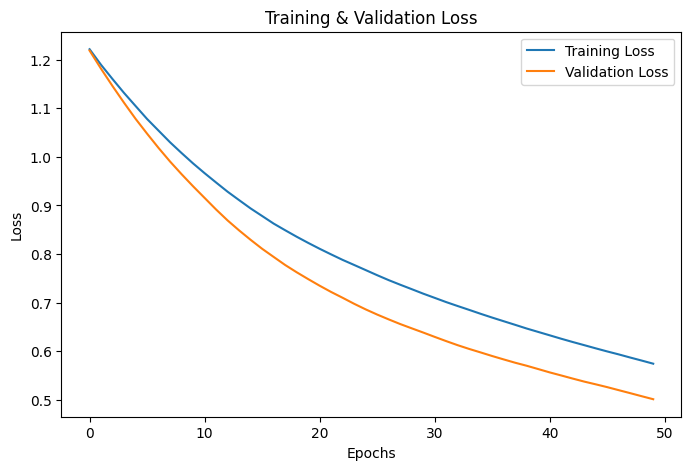

In [21]:
# Plot training & validation loss

plt.figure(figsize=(8, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training & Validation Loss')
plt.show()

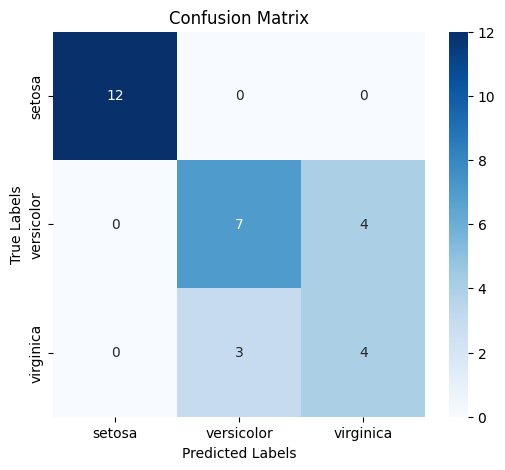

In [22]:
# Plot confusion matrix

plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d', xticklabels=data.target_names, yticklabels=data.target_names)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [23]:
!pip install wandb

[notice] A new release of pip is available: 25.0 -> 25.0.1


[notice] To update, run: python.exe -m pip install --upgrade pip

In [31]:
import wandb
from wandb.integration.keras import WandbCallback

In [32]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Input, Dense

# Initialize W&B
wandb.init(project="iris_mlp", name="experiment_1", config={
    "learning_rate": 0.001,
    "batch_size": 32,
    "epochs": 50,
    "hidden_layer_size": 16,
    "architecture": [
        {"layer": "Input", "units": 4},
        {"layer": "Dense", "units": 16, "activation": "relu"},
        {"layer": "Dense", "units": 3, "activation": "softmax"}
    ]
})

In [33]:
# Access the configuration
config = wandb.config

# Define the model
model = Sequential([
    Input(shape=(4,)),
    Dense(config.hidden_layer_size, activation='relu'),
    Dense(3, activation='softmax')
])

In [34]:
# Compile the model
model.compile(
    optimizer=Adam(learning_rate=config.learning_rate),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [35]:
# Train the model with W&B callback

from wandb.integration.keras import WandbMetricsLogger, WandbModelCheckpoint

# Train the model with W&B callbacks
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    batch_size=config.batch_size,
    epochs=config.epochs,
    callbacks=[
        WandbMetricsLogger(),
        WandbModelCheckpoint(filepath="model-checkpoints/model.keras")
    ]
)


Epoch 1/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 723ms/step - accuracy: 0.2812 - loss: 1.29 ━━━━━━━━━━━━━━━━━━━━ 1s 258ms/step - accuracy: 0.2744 - loss: 1.2708 - val_accuracy: 0.2000 - val_loss: 1.2955
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.4375 - loss: 1.227 ━━━━━━━━━━━━━━━━━━━━ 1s 177ms/step - accuracy: 0.3354 - loss: 1.2458 - val_accuracy: 0.2000 - val_loss: 1.2465
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - accuracy: 0.2188 - loss: 1.246 ━━━━━━━━━━━━━━━━━━━━ 1s 162ms/step - accuracy: 0.2827 - loss: 1.2058 - val_accuracy: 0.2667 - val_loss: 1.2011
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.2812 - loss: 1.269 ━━━━━━━━━━━━━━━━━━━━ 1s 165ms/step - accuracy: 0.3059 - loss: 1.1980 - val_accuracy: 0.2667 - val_loss: 1.1559
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.4062 - loss: 1.084 ━━━━━━━━━━━━━━━━━━━━ 1s 179ms/step - accuracy: 0.3288 - loss: 1.1350 - val_accuracy: 0.2667 - val_loss: 1.1146
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━━━

In [36]:
# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test, y_test)
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

precision = precision_score(y_true_classes, y_pred_classes, average='weighted')
recall = recall_score(y_true_classes, y_pred_classes, average='weighted')
f1 = f1_score(y_true_classes, y_pred_classes, average='weighted')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 0.7667 - loss: 0.494 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step - accuracy: 0.7667 - loss: 0.4943
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/ste ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step


In [37]:
# Log final evaluation metrics
wandb.log({
    "test_loss": test_loss,
    "test_accuracy": test_accuracy,
    "precision": precision,
    "recall": recall,
    "f1_score": f1
})


In [38]:
# Log confusion matrix
cm = confusion_matrix(y_true_classes, y_pred_classes)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
wandb.log({"confusion_matrix": wandb.Image(plt)})
plt.close()

In [39]:
# Log loss curves
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
wandb.log({"loss_curves": wandb.Image(plt)})
plt.close()

In [ ]:
# Finish the W&B run

# wandb.finish()